In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

import seaborn as sns
from lutils.stock import lstock
from statsmodels.tsa.arima_model import ARIMA

from arch import arch_model
from arch.unitroot import ADF

from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
%matplotlib inline

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 8)

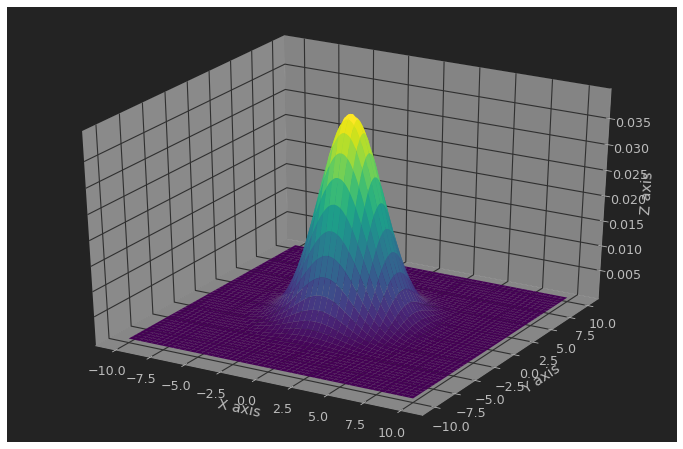

In [6]:
#Parameters to set
mu_x = 0
variance_x = 2

mu_y = 0
variance_y = 2

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x**2, 0], [0, variance_y**2]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [5]:
stock = lstock.get_stock('/home/left5/datas/002108.h5') # 603858

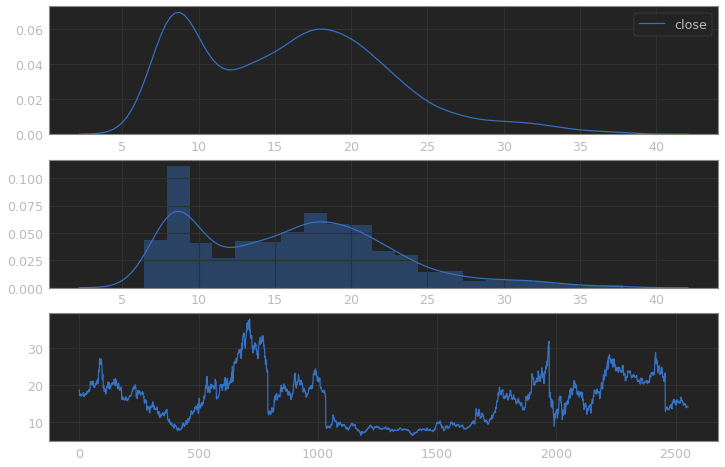

In [6]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(311)
sns.kdeplot(stock['close'], ax=ax1)
ax2 = fig.add_subplot(312)
sns.distplot(stock['close'].values, ax=ax2, label='close')
ax3 = fig.add_subplot(313)
ax3.plot(stock['close'].values)

### arma

In [7]:
print sm.datasets.sunspots.NOTE

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [8]:
dta = sm.datasets.sunspots.load_pandas().data

In [9]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta['YEAR']

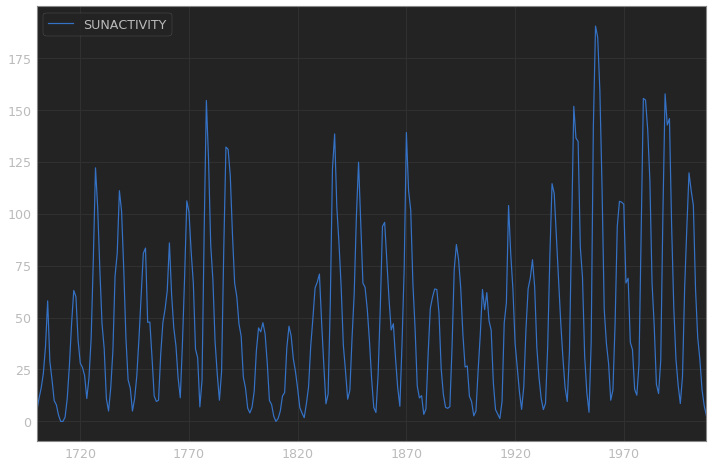

In [10]:
dta.plot(figsize=(12, 8))

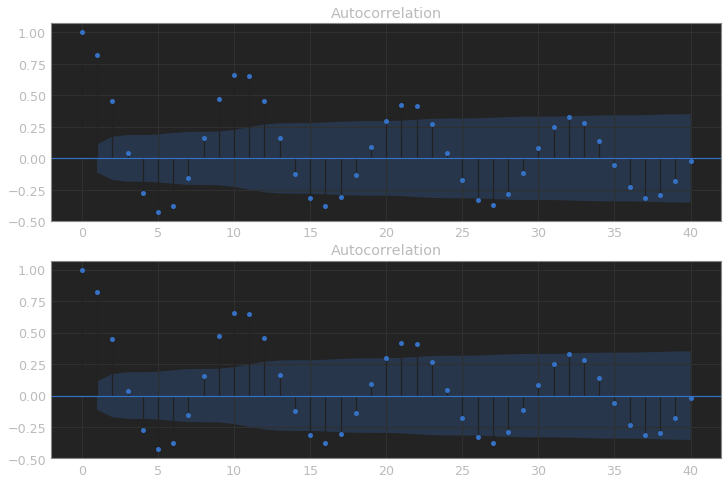

In [11]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(dta, lags=40, ax=ax2)

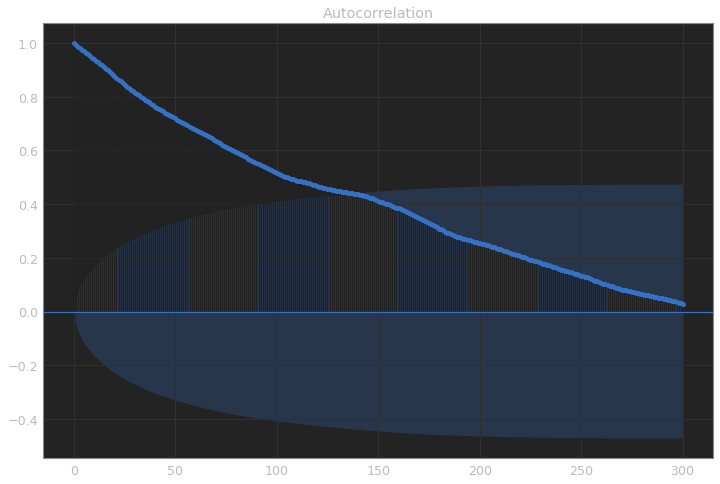

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(stock['close'].values.squeeze(), lags=300, ax=ax)

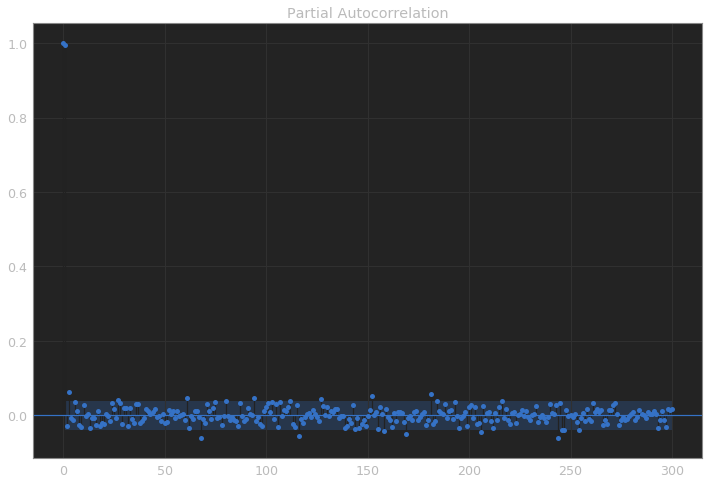

In [13]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(stock['close'].values.squeeze(), lags=300, ax=ax)

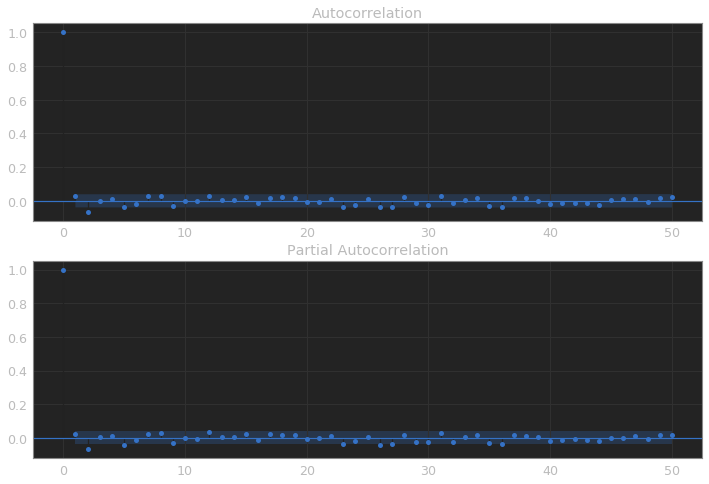

In [14]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
# plt.plot(stock['close'].values - np.roll(stock['close'].values, 1))
fig = sm.graphics.tsa.plot_acf(stock['close'].values - np.roll(stock['close'].values, 1), lags=50, ax=ax1)

ax1 = fig.add_subplot(212)
# plt.plot(stock['close'].values - np.roll(stock['close'].values, 1))
fig = sm.graphics.tsa.plot_pacf(stock['close'].values - np.roll(stock['close'].values, 1), lags=50, ax=ax1)

In [15]:
model = ARIMA(stock['close'].values, order=(2, 1, 2))

In [16]:
close_fit = model.fit(disp=1)

In [17]:
df = pd.DataFrame(stock['close'].values)
diff = df - df.shift()

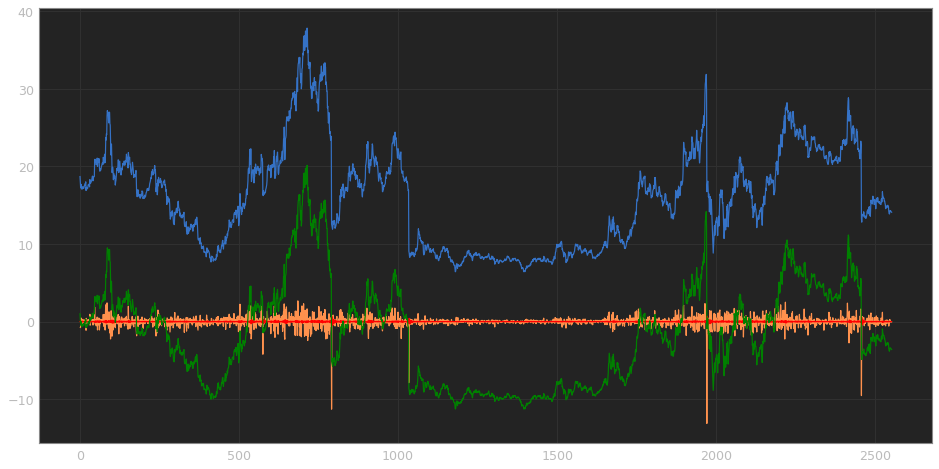

In [24]:
plt.figure(figsize=(16, 8))
# plt.plot(stock['close'].values)
plt.plot(stock['close'].values)
plt.plot(diff, color='y')
plt.plot(close_fit.fittedvalues, color='red')
plt.plot(res.resid, color='green')

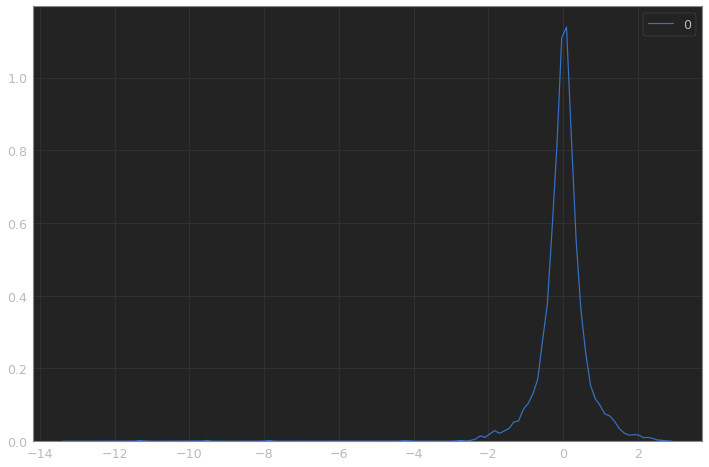

In [26]:
#diff[diff.isnull()] = 0
#diff[0]
plt.figure(figsize=(12, 8))
sns.kdeplot(diff[0])

In [21]:
am = arch_model(stock['close'].values)
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7465.16578562
Iteration:      2,   Func. Count:     14,   Neg. LLF: 7418.62955613
Iteration:      3,   Func. Count:     21,   Neg. LLF: 7348.09351752
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7343.48222493
Iteration:      5,   Func. Count:     36,   Neg. LLF: 7298.15906424
Iteration:      6,   Func. Count:     43,   Neg. LLF: 7261.11714445
Iteration:      7,   Func. Count:     50,   Neg. LLF: 7238.42504303
Iteration:      8,   Func. Count:     57,   Neg. LLF: 7225.27512677
Iteration:      9,   Func. Count:     64,   Neg. LLF: 7218.38952597
Iteration:     10,   Func. Count:     71,   Neg. LLF: 7206.99780282
Iteration:     11,   Func. Count:     78,   Neg. LLF: 7200.86573447
Iteration:     12,   Func. Count:     85,   Neg. LLF: 7195.56716616
Iteration:     13,   Func. Count:     92,   Neg. LLF: 7184.00833269
Iteration:     14,   Func. Count:     98,   Neg. LLF: 7177.21150043
Iteration:     15,   Func. Count:    105,   Neg.

In [22]:
res

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.062
Mean Model:             Constant Mean   Adj. R-squared:                 -0.062
Vol Model:                      GARCH   Log-Likelihood:               -7175.60
Distribution:                  Normal   AIC:                           14359.2
Method:            Maximum Likelihood   BIC:                           14382.6
                                        No. Observations:                 2553
Date:                Tue, Dec 05 2017   Df Residuals:                     2549
Time:                        14:45:29   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            17.6933      0.192     91.974      0.000 [ 17.316, 18.07

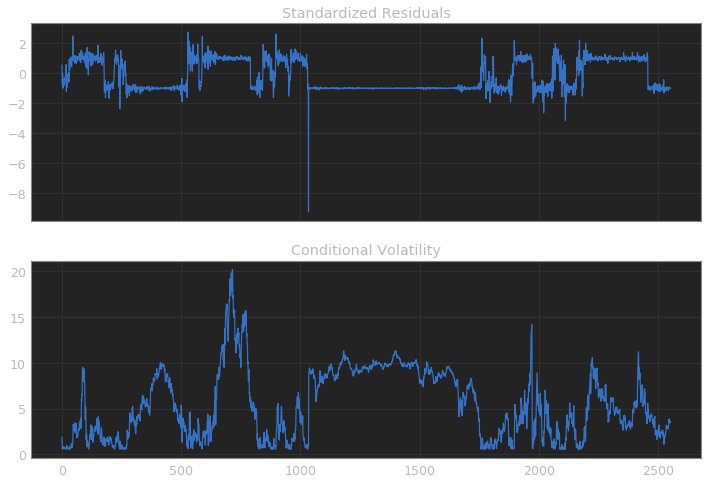

In [27]:
fig = res.plot()

In [28]:
diff_values = np.nan_to_num(diff.values).reshape([-1])

In [29]:
diff_values.shape

(2553,)

In [30]:
# adf = ADF(stock['close'].values, lags=5)
adf = ADF(diff_values, lags=5)
print adf.summary().as_text()

   Augmented Dickey-Fuller Results   
Test Statistic                -21.724
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


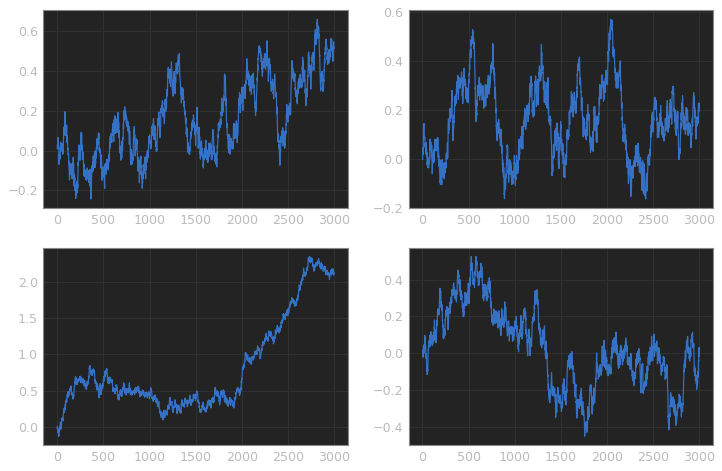

In [31]:
n = 3000
w1 = np.cumsum(np.random.randn(n)) / np.sqrt(n)
w2 = np.cumsum(np.random.randn(n)) / np.sqrt(n)
w3 = np.cumsum(np.random.randn(n)) / np.sqrt(n)
w4 = np.cumsum(np.random.randn(n)) / np.sqrt(n)

figure = plt.figure(figsize=(12, 8))
ax1 = figure.add_subplot(221)
ax1.plot(w1)

ax2 = figure.add_subplot(222)
ax2.plot(w2)

ax3 = figure.add_subplot(223)
ax3.plot(w3)

ax4 = figure.add_subplot(224)
ax4.plot(w4)

figure.show()

In [32]:
log_rate = np.log(stock.close) - np.log(stock.close.shift(1))
pct_change = stock.close.pct_change()

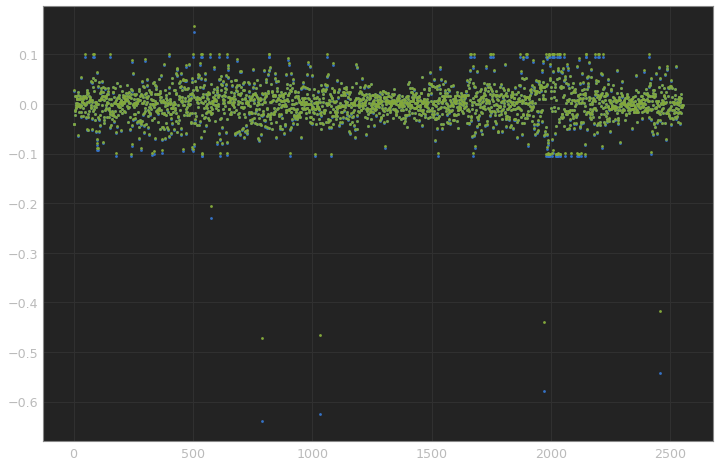

In [33]:
plt.plot(log_rate.values, '.')
plt.plot(pct_change.values, '.', color='g')

###

In [34]:
a = np.random.randn(10000)

In [35]:
mu = np.mean(a)
sigma = np.var(a)

skew = np.power((a - mu) / sigma, 3)
kurt = np.power((a - mu) / sigma, 4)

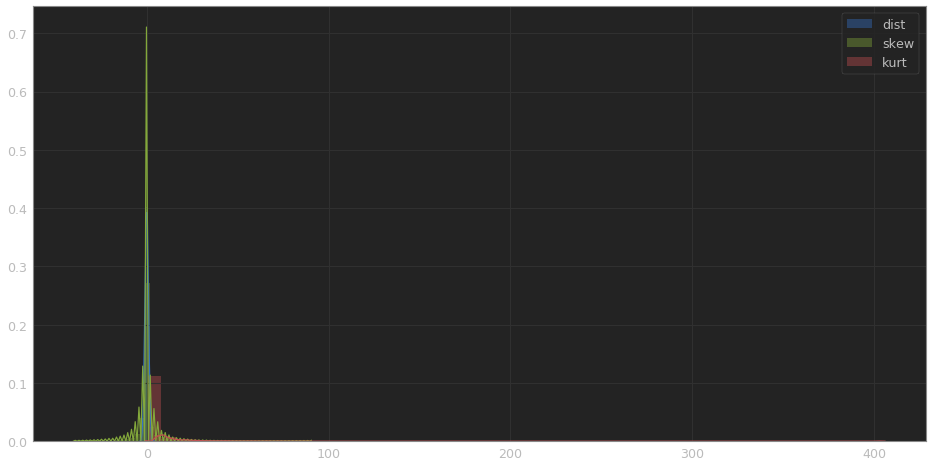

In [37]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)

sns.distplot(a, ax=ax, label='dist')
sns.distplot(skew, ax=ax, label='skew')
sns.distplot(kurt, ax=ax, label='kurt')
ax.legend()

In [12]:
sns.distplot?